In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import mplfinance as mpf #prara grgaficar velas
# https://github.com/matplotlib/mplfinance/tree/master/examples


# En esta pagina puedes consultar la documentacion de esta libreria

In [3]:
from datetime import datetime, timedelta
from threading import Thread
from time import sleep

class Temporizador(Thread):
    def __init__(self, hora, delay, funcion):
        # El constructor recibe como parámetros:
        ## hora = en un string con formato hh:mm:ss y es la hora a la que queremos que se ejecute la función.
        ## delay = tiempo de espera entre comprobaciones en segundos.
        ## funcion = función a ejecutar.

        super(Temporizador, self).__init__()
        self._estado = True
        self.hora = hora
        self.delay = delay
        self.funcion = funcion

    def stop(self):
        self._estado = False

    def run(self):
        # Pasamos el string a dato tipo datetime
        aux = datetime.strptime(self.hora, '%H:%M:%S')
        # Obtenemos la fecha y hora actuales.
        hora = datetime.now()
        # Sustituimos la hora por la hora a ejecutar la función.
        hora = hora.replace(hour = aux.hour, minute=aux.minute, second=aux.second, microsecond = 0)
        # Comprobamos si la hora ya a pasado o no, si ha pasado sumamos un dia (hoy ya no se ejecutará).
        if hora <= datetime.now():
            hora = hora + timedelta(0,300)
        print('Ejecución automática iniciada')
        print('Proxima ejecución programada el {0} a las {1}'.format(hora.date(),  hora.time()))
        # Iniciamos el ciclo:
        while self._estado:
           
            # Comparamos la hora actual con la de ejecución y ejecutamos o no la función.
            ## Si se ejecuta sumamos un dia a la fecha objetivo.
            if hora <= datetime.now():
                print('Ejecución programada ejecutada el {0} a las {1}'.format(hora.date(),  hora.time()))
                hora= hora + timedelta(0,300)
                positions_total1 = len(mt5.positions_get(symbol="EPU20"))
                if positions_total1 == 0 :
                    if hora >= datetime.now():
                        self.funcion()              
                        print('Próxima ejecución programada el {0} a las {1}'.format(hora.date(),  hora.time()))  
           
            # Esperamos x segundos para volver a ejecutar la comprobación.
            sleep(self.delay)

        #Si usamos el método stop() salimos del ciclo y el hilo terminará.
        else:
             print('Ejecución automática finalizada')

MetaTrader5 package author:  MetaQuotes Software Corp.
MetaTrader5 package version:  5.0.31
------------------------------------------------------------
Hora de envio: 2020-09-16 19:45:00.003256
Rango no operativo segun angulo de inclinacion

Mostramos el frame de datos con la información
                        Open     High      Low    Close  spread  Volume  VWMA Rolling  VWMA_BB High 1  VWMA_BB Low 1  counter  counter1    angulo            tendencia
time                                                                                                                                                                  
2020-09-16 20:35:00  3422.50  3429.50  3420.25  3428.75      25  3812.0   3414.124756     3422.237799    3406.011712        1       248  0.835205  sin tendencia clara
2020-09-16 20:40:00  3428.75  3429.75  3423.00  3423.00      25  2857.0   3414.289062     3422.412295    3406.165830        1       249  0.835205  sin tendencia clara


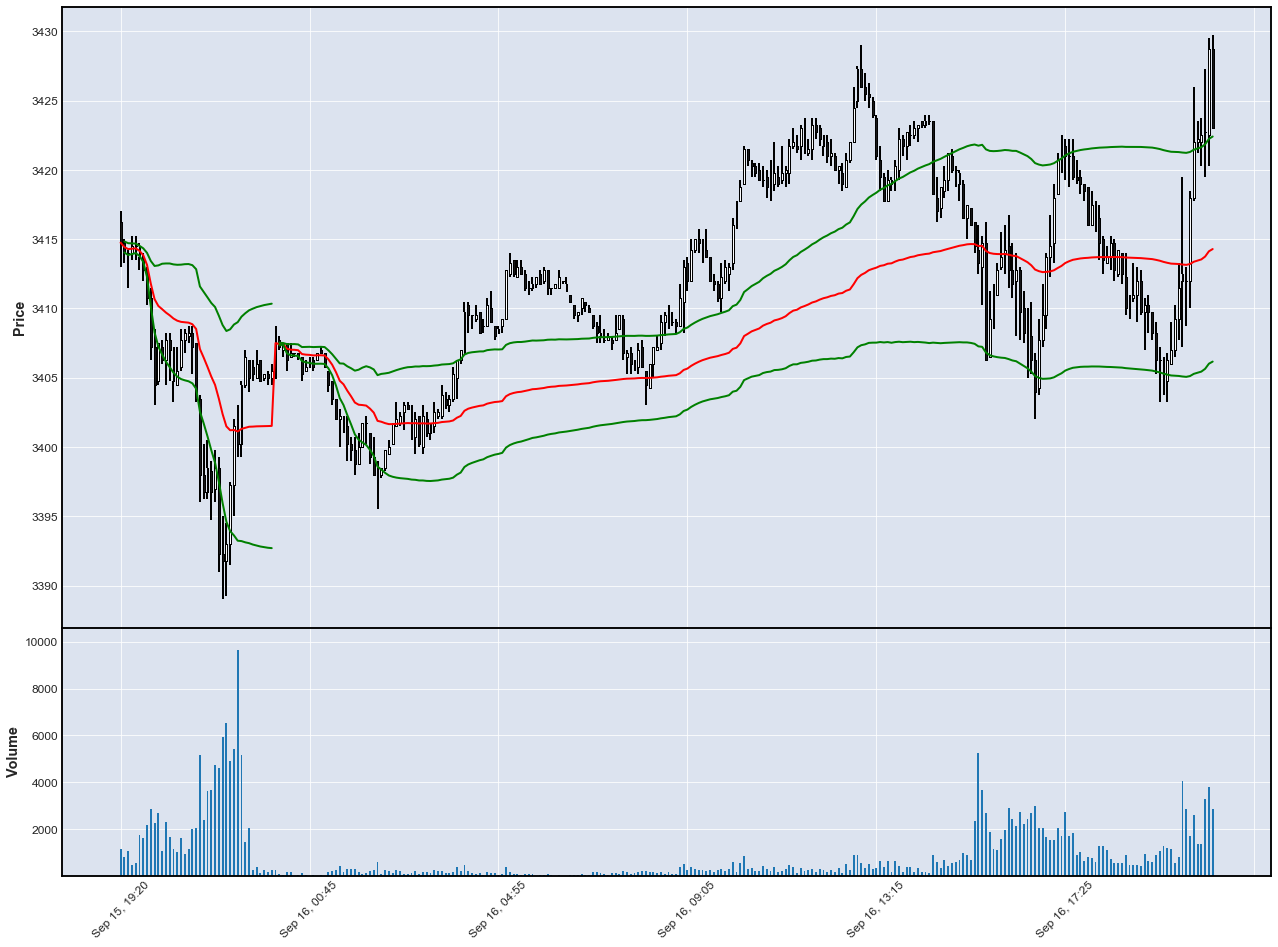

Próxima ejecución programada el 2020-09-16 a las 19:50:00


In [ ]:
from datetime import time
from datetime import datetime
import time
import MetaTrader5 as mt5
import pandas as pd
import pytz
from IPython.display import clear_output



# mostramos los datos sobre el paquete MetaTrader5

 
# importamos el módulo pandas para mostrar los datos obtenidos en forma de recuadro

pd.set_option('display.max_columns', 500) # cuántas columnas mostramos
pd.set_option('display.width', 1500)      # anchura máx. del recuadro para la muestra
# importamos el módulo pytz para trabajar con el huso horario

 
# establecemos la conexión con el terminal MetaTrader 5
#if not mt5.initialize(login=669047, server="AMPGlobalEU-Live",password="Heveterer2"):
if not mt5.initialize(login=1180541, server="AMPGlobalUSA-Demo",password="hwefgv2y"):
    print("initialize() failed, error code =",mt5.last_error())
    quit()

    
# establecemos el huso horario en UTC
timezone = pytz.timezone("Etc/UTC")
def bucle():
    clear_output(wait=True)
# creamos el objeto datetime en el huso horario UTC, para que no se aplique el desplazamiento del huso horario local
    print("MetaTrader5 package author: ",mt5.__author__)
    print("MetaTrader5 package version: ",mt5.__version__)
    print('------------------------------------------------------------') 
    print('Hora de envio: ' + str(datetime.now()))
    utc_from = datetime.now()
 
    # obtenemos 10 barras de EURUSD H4 a partir del 01.10.2020 en el huso horario UTC
    rates = mt5.copy_rates_from("EPU20", mt5.TIMEFRAME_M5, utc_from, 290)
    # finalizamos la conexión con el terminal MetaTrader 5
    mt5.shutdown()    

    # creamos un DataFrame de los datos obtenidos
    rates_frame = pd.DataFrame(rates)
    # convertimos la hora en segundos al formato datetime
    rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
    rates_frame['time']=rates_frame['time'] + timedelta(hours=+2) 
    rates_frame = rates_frame.rename(columns={'open':'Open', 'high':'High', 'low':'Low', 'close':'Close', 'real_volume':'Volume'})
    rates_frame['time']= pd.to_datetime(rates_frame['time'], format = '%Y-%m-%d %H:%M:%S')
    rates_frame = rates_frame.set_index(pd.DatetimeIndex(rates_frame['time']))
    rates_frame= rates_frame.drop(['time'], axis=1)
    rates_frame['Close'] = pd.to_numeric(rates_frame['Close'], downcast='float')
    rates_frame['Volume'] = pd.to_numeric(rates_frame['Volume'], downcast='float')
    def VWMA_BB_restart_diario(data, std1, std2):
        '''Funcion que calcula la vwma con un periodo determinado (wind), y sus 2 bandas de bollinguer, asociadas a 2 
        desviaciones estandar determinadas en la funcion como std1 y std2'''


        rolling_vwma = data.eval('wgtd = Close * Volume', inplace=False).groupby(data.index.date).cumsum().eval('wgtd / Volume')

        rolling_std = (rolling_vwma.groupby(data.index.date).expanding()).std().droplevel(0)

        data['VWMA Rolling'] = rolling_vwma
        data['VWMA_BB High 1'] = rolling_vwma + (rolling_std * std1)
        data['VWMA_BB Low 1'] = rolling_vwma - (rolling_std * std1)
        data['VWMA_BB High 2'] = rolling_vwma + (rolling_std * std2)
        data['VWMA_BB Low 2'] = rolling_vwma - (rolling_std * std2)

        return data
    
    rates_frame = VWMA_BB_restart_diario(rates_frame, 1.8, 1.8)
    rates_frame['counter'] = 1
    rates_frame['counter1'] = rates_frame['counter'].groupby(rates_frame.index.date).cumsum()
    rates_frame = rates_frame.drop(['tick_volume','VWMA_BB High 2', 'VWMA_BB Low 2'], axis=1)
    rates_frame['angulo'] = (abs(rates_frame['VWMA Rolling'].iloc[-1] - rates_frame['VWMA Rolling'].iloc[-5]))
    rates_frame['tendencia'] = None
     # mostramos los datos

   
    if not mt5.initialize():
        print("initialize() failed, error code =",mt5.last_error())
        quit()
    
    symbol = "EPU20"    
    positions_total = len(mt5.positions_get(symbol=symbol))
    orders = len(mt5.orders_get(symbol=symbol))
    
    if positions_total > 0:
        print('Operacion en curso...(in)')
        
    if positions_total == 0:
        if (abs(rates_frame['VWMA Rolling'].iloc[-1] - rates_frame['VWMA Rolling'].iloc[-5]) <= 0.5):
            rates_frame['tendencia'] = 'Lateral'
            print("\nMostramos el frame de datos con la información")
            print(rates_frame.iloc[[-2,-1]])
            if ((rates_frame['Close'].iloc[-1] <= rates_frame["VWMA_BB Low 1"].iloc[-1])&((rates_frame['Close'].iloc[-3:-2].mean() <= rates_frame["Close"].iloc[-1]))&(rates_frame['counter1'].iloc[-1] >= 80)):
                symbol_info = mt5.symbol_info(symbol)
                if symbol_info is None:
                    print(symbol, "not found, can not call order_check()")
                    mt5.shutdown()
                    quit()

                # si el símbolo no está disponible en MarketWatch, lo añadimos
                if not symbol_info.visible:
                    print(symbol, "is not visible, trying to switch on")
                    if not mt5.symbol_select(symbol,True):
                        print("symbol_select({}}) failed, exit",symbol)
                        mt5.shutdown()
                        quit()
             #ORDEN de compra-------------------------------------------------------------------------------------
                tipo = 'buy'
                lot = 1.0
                point = mt5.symbol_info(symbol).point
                price = mt5.symbol_info_tick(symbol).bid
                deviation = 0
                request = {
                    "action": mt5.TRADE_ACTION_PENDING,
                    "symbol": symbol,
                    "volume": lot,
                    "type": mt5.ORDER_TYPE_BUY_LIMIT,
                    "price": price,
                    "deviation": deviation,
                    "magic": 234000,
                    "comment": "python script open",
                    "type_time": mt5.ORDER_TIME_GTC,
                    "type_filling": mt5.ORDER_FILLING_RETURN,
                }
                result = mt5.order_send(request)
                order= result.order
                print("1. order_send():{} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price,deviation))
                
                bb_r_vwma = mpf.make_addplot(rates_frame['VWMA Rolling'],color='red')
                bb_high1 = mpf.make_addplot(rates_frame['VWMA_BB High 1'],color='green')
                bb_low1 = mpf.make_addplot(rates_frame['VWMA_BB Low 1'],color='green')
                indicadores = [bb_r_vwma, bb_high1, bb_low1]
                mpf.plot(rates_frame, type = 'candle', figscale = 3, volume = True, addplot = indicadores)     
                #---------------------------------------------------------------------------------------------------


                counter = 0
                #esperamos a que se rellene-------------------------------------------------------------------------
                while positions_total == 0:
                    print("1. order_send(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price,deviation))
                    time.sleep(1)
                    print('Waiting for fill open...')
                    positions_total = len(mt5.positions_get(symbol=symbol))
                    counter = counter + 1
                    print(counter)
                    if counter == 298:
                        request = {
                        "action": mt5.TRADE_ACTION_REMOVE,
                        "order": order,
                        }
                        result = mt5.order_send(request)
                        counter = 0
                        positions_total = len(mt5.positions_get(symbol=symbol))
                        break
                    continue
                #---------------------------------------------------------------------------------------------------    

                if positions_total > 0:



                    tipo = 'sell'
                    lot = 1.0
                    point = mt5.symbol_info(symbol).point
                    price3 = price - 5
                    deviation = 0
                    request2 = {
                        "action": mt5.TRADE_ACTION_PENDING,
                        "symbol": symbol,
                        "volume": lot,
                        "type": mt5.ORDER_TYPE_SELL_STOP,
                        "price": price3,
                        "deviation": deviation,
                        "magic": 234001,
                        "comment": "python script SL",
                        "type_time": mt5.ORDER_TIME_GTC,
                        "type_filling": mt5.ORDER_FILLING_RETURN,
                    }
                    result2 = mt5.order_send(request2)
                    order2 = result2.order
                    print("2. SL placed(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price3,deviation))

                    tipo = 'sell'
                    lot = 1.0
                    price2 = price + 20
                    deviation = 0
                    request1 = {
                        "action": mt5.TRADE_ACTION_PENDING,
                        "symbol": symbol,
                        "volume": lot,
                        "type": mt5.ORDER_TYPE_SELL_LIMIT,
                        "price": price2,
                        "deviation": deviation,
                        "magic": 234001,
                        "comment": "python script TP",
                        "type_time": mt5.ORDER_TIME_GTC,
                        "type_filling": mt5.ORDER_FILLING_RETURN,
                    }
                    result1 = mt5.order_send(request1)
                    order1 = result1.order
                    print("3. TP placed(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price2,deviation))

                    #---------------------------------------------------------------------------------------
                    #esperamos a que unoi de ellos se complete y cancele el otro        
                    while positions_total > 0:
                        time.sleep(2)
                        print('Waiting for fill close...')
                        positions_total = len(mt5.positions_get(symbol=symbol))
                        continue

                    request1 = {
                                "action": mt5.TRADE_ACTION_REMOVE,
                                "order": order1,
                                }
                    result1 = mt5.order_send(request1)
                    request2 = {
                                "action": mt5.TRADE_ACTION_REMOVE,
                                "order": order2,
                                }
                    result2 = mt5.order_send(request2)   

                    # comprobamos el resultado de la ejecución

            elif ((rates_frame['Close'].iloc[-1] >= rates_frame["VWMA_BB High 1"].iloc[-1])&(rates_frame['Close'].iloc[-3:-2].mean() >= rates_frame["Close"].iloc[-1])&(rates_frame['counter1'].iloc[-1] >= 80)):#si en esa vela precio de apertura es menor o igual al valor de VWMA_BB LOW 1:

                symbol_info = mt5.symbol_info(symbol)
                if symbol_info is None:
                    print(symbol, "not found, can not call order_check()")
                    mt5.shutdown()
                    quit()

                # si el símbolo no está disponible en MarketWatch, lo añadimos
                if not symbol_info.visible:
                    print(symbol, "is not visible, trying to switch on")
                    if not mt5.symbol_select(symbol,True):
                        print("symbol_select({}}) failed, exit",symbol)
                        mt5.shutdown()
                        quit()


            #Entramos en venta------------------------------------------------------------------------------------------------
                tipo = 'sell'
                lot = 1.0
                point = mt5.symbol_info(symbol).point
                price = mt5.symbol_info_tick(symbol).ask
                deviation = 0
                request = {
                    "action": mt5.TRADE_ACTION_PENDING,
                    "symbol": symbol,
                    "volume": lot,
                    "type": mt5.ORDER_TYPE_SELL_LIMIT,
                    "price": price,
                    "deviation": deviation,
                    "magic": 234000,
                    "comment": "python script open",
                    "type_time": mt5.ORDER_TIME_GTC,
                    "type_filling": mt5.ORDER_FILLING_RETURN,
                }

            # enviamos la solicitud comercial
                result = mt5.order_send(request)
                order = result.order
                bb_r_vwma = mpf.make_addplot(rates_frame['VWMA Rolling'],color='red')
                bb_high1 = mpf.make_addplot(rates_frame['VWMA_BB High 1'],color='green')
                bb_low1 = mpf.make_addplot(rates_frame['VWMA_BB Low 1'],color='green')
                indicadores = [bb_r_vwma, bb_high1, bb_low1]
                mpf.plot(rates_frame, type = 'candle', figscale = 3, volume = True, addplot = indicadores)

                counter = 0
            #esperamos a que se rellene-------------------------------------------------------------------------
                while positions_total == 0:
                    time.sleep(1)
                    print('Waiting for fill open...')
                    positions_total = len(mt5.positions_get(symbol=symbol))
                    counter = counter + 1
                    print(counter)
                    if counter == 298:
                        request = {
                        "action": mt5.TRADE_ACTION_REMOVE,
                        "order": order,
                        }
                        result = mt5.order_send(request)
                        counter = 0
                        positions_total = len(mt5.positions_get(symbol=symbol))
                        break
                    continue

                if positions_total > 0: 
                    print("1. order_send(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price,deviation))

                    tipo = 'buy'
                    lot = 1.0
                    point = mt5.symbol_info(symbol).point
                    price3 = price + 5
                    deviation = 0
                    request4 = {
                        "action": mt5.TRADE_ACTION_PENDING,
                        "symbol": symbol,
                        "volume": lot,
                        "type": mt5.ORDER_TYPE_BUY_STOP,
                        "price": price3,
                        "deviation": deviation,
                        "magic": 234001,
                        "comment": "python script SL",
                        "type_time": mt5.ORDER_TIME_GTC,
                        "type_filling": mt5.ORDER_FILLING_RETURN,
                    }
                    result4 = mt5.order_send(request4)
                    order4 = result4.order
                    print("2. SL placed(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price3,deviation))

                    tipo = 'buy'
                    lot = 1.0
                    price2 = price - 20
                    deviation = 0
                    request3 = {
                        "action": mt5.TRADE_ACTION_PENDING,
                        "symbol": symbol,
                        "volume": lot,
                        "type": mt5.ORDER_TYPE_BUY_LIMIT,
                        "price": price2,
                        "deviation": deviation,
                        "magic": 234001,
                        "comment": "python script TP",
                        "type_time": mt5.ORDER_TIME_GTC,
                        "type_filling": mt5.ORDER_FILLING_RETURN,
                    }
                    result3 = mt5.order_send(request3)
                    order3 = result3.order
                    print("3. TP placed(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price2,deviation))

                    while positions_total > 0:
                        time.sleep(2)
                        print('Waiting for fill close...')
                        positions_total = len(mt5.positions_get(symbol=symbol))
                        continue

                    request5 = {
                                "action": mt5.TRADE_ACTION_REMOVE,
                                "order": order3,
                                }
                    result5 = mt5.order_send(request5)
                    request6 = {
                                "action": mt5.TRADE_ACTION_REMOVE,
                                "order": order4,
                                }
                    result6 = mt5.order_send(request6)

                # comprobamos el resultado de la ejecución


            else:
                if (rates_frame['counter1'].iloc[-1] >= 80):
                    print('No se cumple condicion')
                    mean_last_3=rates_frame['Close'].iloc[-3:-1].mean()
                    if rates_frame['Close'].iloc[-1] <= rates_frame["VWMA_BB Low 1"].iloc[-1]:
                        print ('Precio close ({}) no es superior a la media de los ultimos 3 close({})'.format(rates_frame['Close'].iloc[-1], mean_last_3))
                    if rates_frame['Close'].iloc[-1] >= rates_frame["VWMA_BB High 1"].iloc[-1]:
                        print ('Precio close ({}) no es inferior a la media de los ultimos 3 close({})'.format(rates_frame['Close'].iloc[-1], mean_last_3))
                    bb_r_vwma = mpf.make_addplot(rates_frame['VWMA Rolling'],color='red')
                    bb_high1 = mpf.make_addplot(rates_frame['VWMA_BB High 1'],color='green')
                    bb_low1 = mpf.make_addplot(rates_frame['VWMA_BB Low 1'],color='green')
                    indicadores = [bb_r_vwma, bb_high1, bb_low1]
                    mpf.plot(rates_frame, type = 'candle', figscale = 3, volume = True, addplot = indicadores)

        elif (abs(rates_frame['VWMA Rolling'].iloc[-1] - rates_frame['VWMA Rolling'].iloc[-5]) > 3.5):
            rates_frame['tendencia'] = 'Tendencial'
            print("\nMostramos el frame de datos con la información")
            print(rates_frame.iloc[[-2,-1]])
            if ((rates_frame['Close'].iloc[-1] >= rates_frame["VWMA_BB Low 1"].iloc[-1])&((rates_frame['Close'].iloc[-2:-1].mean() >= rates_frame["Close"].iloc[-1]))&(rates_frame['counter1'].iloc[-1] >= 80)):
                symbol_info = mt5.symbol_info(symbol)
                if symbol_info is None:
                    print(symbol, "not found, can not call order_check()")
                    mt5.shutdown()
                    quit()

                # si el símbolo no está disponible en MarketWatch, lo añadimos
                if not symbol_info.visible:
                    print(symbol, "is not visible, trying to switch on")
                    if not mt5.symbol_select(symbol,True):
                        print("symbol_select({}}) failed, exit",symbol)
                        mt5.shutdown()
                        quit()
             #ORDEN de compra-------------------------------------------------------------------------------------
                tipo = 'buy'
                lot = 1.0
                point = mt5.symbol_info(symbol).point
                price = mt5.symbol_info_tick(symbol).bid
                deviation = 0
                request = {
                    "action": mt5.TRADE_ACTION_PENDING,
                    "symbol": symbol,
                    "volume": lot,
                    "type": mt5.ORDER_TYPE_BUY_LIMIT,
                    "price": price,
                    "deviation": deviation,
                    "magic": 234000,
                    "comment": "python script open",
                    "type_time": mt5.ORDER_TIME_GTC,
                    "type_filling": mt5.ORDER_FILLING_RETURN,
                }
                result = mt5.order_send(request)
                order= result.order
                print("1. order_send():{} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price,deviation))
                
                bb_r_vwma = mpf.make_addplot(rates_frame['VWMA Rolling'],color='red')
                bb_high1 = mpf.make_addplot(rates_frame['VWMA_BB High 1'],color='green')
                bb_low1 = mpf.make_addplot(rates_frame['VWMA_BB Low 1'],color='green')
                indicadores = [bb_r_vwma, bb_high1, bb_low1]
                mpf.plot(rates_frame, type = 'candle', figscale = 3, volume = True, addplot = indicadores)     
                #---------------------------------------------------------------------------------------------------


                counter = 0
                #esperamos a que se rellene-------------------------------------------------------------------------
                while positions_total == 0:
                    print("1. order_send(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price,deviation))
                    time.sleep(1)
                    print('Waiting for fill open...')
                    positions_total = len(mt5.positions_get(symbol=symbol))
                    counter = counter + 1
                    print(counter)
                    if counter == 298:
                        request = {
                        "action": mt5.TRADE_ACTION_REMOVE,
                        "order": order,
                        }
                        result = mt5.order_send(request)
                        counter = 0
                        positions_total = len(mt5.positions_get(symbol=symbol))
                        break
                    continue
                #---------------------------------------------------------------------------------------------------    

                if positions_total > 0:



                    tipo = 'sell'
                    lot = 1.0
                    point = mt5.symbol_info(symbol).point
                    price3 = price - 5
                    deviation = 0
                    request2 = {
                        "action": mt5.TRADE_ACTION_PENDING,
                        "symbol": symbol,
                        "volume": lot,
                        "type": mt5.ORDER_TYPE_SELL_STOP,
                        "price": price3,
                        "deviation": deviation,
                        "magic": 234001,
                        "comment": "python script SL",
                        "type_time": mt5.ORDER_TIME_GTC,
                        "type_filling": mt5.ORDER_FILLING_RETURN,
                    }
                    result2 = mt5.order_send(request2)
                    order2 = result2.order
                    print("2. SL placed(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price3,deviation))

                    tipo = 'sell'
                    lot = 1.0
                    price2 = price + 20
                    deviation = 0
                    request1 = {
                        "action": mt5.TRADE_ACTION_PENDING,
                        "symbol": symbol,
                        "volume": lot,
                        "type": mt5.ORDER_TYPE_SELL_LIMIT,
                        "price": price2,
                        "deviation": deviation,
                        "magic": 234001,
                        "comment": "python script TP",
                        "type_time": mt5.ORDER_TIME_GTC,
                        "type_filling": mt5.ORDER_FILLING_RETURN,
                    }
                    result1 = mt5.order_send(request1)
                    order1 = result1.order
                    print("3. TP placed(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price2,deviation))

                    #---------------------------------------------------------------------------------------
                    #esperamos a que unoi de ellos se complete y cancele el otro        
                    while positions_total > 0:
                        time.sleep(2)
                        print('Waiting for fill close...')
                        positions_total = len(mt5.positions_get(symbol=symbol))
                        continue

                    request1 = {
                                "action": mt5.TRADE_ACTION_REMOVE,
                                "order": order1,
                                }
                    result1 = mt5.order_send(request1)
                    request2 = {
                                "action": mt5.TRADE_ACTION_REMOVE,
                                "order": order2,
                                }
                    result2 = mt5.order_send(request2)   

                    # comprobamos el resultado de la ejecución

            elif ((rates_frame['Close'].iloc[-1] <= rates_frame["VWMA_BB High 1"].iloc[-1])&(rates_frame['Close'].iloc[-2:-1].mean() <= rates_frame["Close"].iloc[-1])&(rates_frame['counter1'].iloc[-1] >= 80)):#si en esa vela precio de apertura es menor o igual al valor de VWMA_BB LOW 1:

                symbol_info = mt5.symbol_info(symbol)
                if symbol_info is None:
                    print(symbol, "not found, can not call order_check()")
                    mt5.shutdown()
                    quit()

                # si el símbolo no está disponible en MarketWatch, lo añadimos
                if not symbol_info.visible:
                    print(symbol, "is not visible, trying to switch on")
                    if not mt5.symbol_select(symbol,True):
                        print("symbol_select({}}) failed, exit",symbol)
                        mt5.shutdown()
                        quit()


            #Entramos en venta------------------------------------------------------------------------------------------------
                tipo = 'sell'
                lot = 1.0
                point = mt5.symbol_info(symbol).point
                price = mt5.symbol_info_tick(symbol).ask
                deviation = 0
                request = {
                    "action": mt5.TRADE_ACTION_PENDING,
                    "symbol": symbol,
                    "volume": lot,
                    "type": mt5.ORDER_TYPE_SELL_LIMIT,
                    "price": price,
                    "deviation": deviation,
                    "magic": 234000,
                    "comment": "python script open",
                    "type_time": mt5.ORDER_TIME_GTC,
                    "type_filling": mt5.ORDER_FILLING_RETURN,
                }

            # enviamos la solicitud comercial
                result = mt5.order_send(request)
                order = result.order
                
                bb_r_vwma = mpf.make_addplot(rates_frame['VWMA Rolling'],color='red')
                bb_high1 = mpf.make_addplot(rates_frame['VWMA_BB High 1'],color='green')
                bb_low1 = mpf.make_addplot(rates_frame['VWMA_BB Low 1'],color='green')
                indicadores = [bb_r_vwma, bb_high1, bb_low1]
                mpf.plot(rates_frame, type = 'candle', figscale = 3, volume = True, addplot = indicadores)

                counter = 0
            #esperamos a que se rellene-------------------------------------------------------------------------
                while positions_total == 0:
                    time.sleep(1)
                    print('Waiting for fill open...')
                    positions_total = len(mt5.positions_get(symbol=symbol))
                    counter = counter + 1
                    print(counter)
                    if counter == 298:
                        request = {
                        "action": mt5.TRADE_ACTION_REMOVE,
                        "order": order,
                        }
                        result = mt5.order_send(request)
                        counter = 0
                        positions_total = len(mt5.positions_get(symbol=symbol))
                        break
                    continue

                if positions_total > 0: 
                    print("1. order_send(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price,deviation))

                    tipo = 'buy'
                    lot = 1.0
                    point = mt5.symbol_info(symbol).point
                    price3 = price + 5
                    deviation = 0
                    request4 = {
                        "action": mt5.TRADE_ACTION_PENDING,
                        "symbol": symbol,
                        "volume": lot,
                        "type": mt5.ORDER_TYPE_BUY_STOP,
                        "price": price3,
                        "deviation": deviation,
                        "magic": 234001,
                        "comment": "python script SL",
                        "type_time": mt5.ORDER_TIME_GTC,
                        "type_filling": mt5.ORDER_FILLING_RETURN,
                    }
                    result4 = mt5.order_send(request4)
                    order4 = result4.order
                    print("2. SL placed(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price3,deviation))

                    tipo = 'buy'
                    lot = 1.0
                    price2 = price - 20
                    deviation = 0
                    request3 = {
                        "action": mt5.TRADE_ACTION_PENDING,
                        "symbol": symbol,
                        "volume": lot,
                        "type": mt5.ORDER_TYPE_BUY_LIMIT,
                        "price": price2,
                        "deviation": deviation,
                        "magic": 234001,
                        "comment": "python script TP",
                        "type_time": mt5.ORDER_TIME_GTC,
                        "type_filling": mt5.ORDER_FILLING_RETURN,
                    }
                    result3 = mt5.order_send(request3)
                    order3 = result3.order
                    print("3. TP placed(): {} by {} {} lots at {} with deviation={} points".format(tipo,symbol,lot,price2,deviation))

                    while positions_total > 0:
                        time.sleep(2)
                        print('Waiting for fill close...')
                        positions_total = len(mt5.positions_get(symbol=symbol))
                        continue

                    request5 = {
                                "action": mt5.TRADE_ACTION_REMOVE,
                                "order": order3,
                                }
                    result5 = mt5.order_send(request5)
                    request6 = {
                                "action": mt5.TRADE_ACTION_REMOVE,
                                "order": order4,
                                }
                    result6 = mt5.order_send(request6)

                # comprobamos el resultado de la ejecución


            else:
                if (rates_frame['counter1'].iloc[-1] >= 80):
                    print('No se cumple condicion')
                    mean_last_3=rates_frame['Close'].iloc[-3:-1].mean()
                    if rates_frame['Close'].iloc[-1] <= rates_frame["VWMA_BB Low 1"].iloc[-1]:
                        print ('Precio close ({}) no es superior a la media de los ultimos 3 close({})'.format(rates_frame['Close'].iloc[-1], mean_last_3))
                    if rates_frame['Close'].iloc[-1] >= rates_frame["VWMA_BB High 1"].iloc[-1]:
                        print ('Precio close ({}) no es inferior a la media de los ultimos 3 close({})'.format(rates_frame['Close'].iloc[-1], mean_last_3))

                bb_r_vwma = mpf.make_addplot(rates_frame['VWMA Rolling'],color='red')
                bb_high1 = mpf.make_addplot(rates_frame['VWMA_BB High 1'],color='green')
                bb_low1 = mpf.make_addplot(rates_frame['VWMA_BB Low 1'],color='green')
                indicadores = [bb_r_vwma, bb_high1, bb_low1]
                mpf.plot(rates_frame, type = 'candle', figscale = 3, volume = True, addplot = indicadores)
        else:
            print('Rango no operativo segun angulo de inclinacion')
            rates_frame['tendencia'] = 'sin tendencia clara'
            print("\nMostramos el frame de datos con la información")
            print(rates_frame.iloc[[-2,-1]])
            bb_r_vwma = mpf.make_addplot(rates_frame['VWMA Rolling'],color='red')
            bb_high1 = mpf.make_addplot(rates_frame['VWMA_BB High 1'],color='green')
            bb_low1 = mpf.make_addplot(rates_frame['VWMA_BB Low 1'],color='green')
            indicadores = [bb_r_vwma, bb_high1, bb_low1]
            mpf.plot(rates_frame, type = 'candle', figscale = 3, volume = True, addplot = indicadores)
          
t = Temporizador('14:40:00',0.01,bucle)# Instanciamos nuestra clase Temporizador
t.start() #Iniciamos el hilo

#Mientras el programa principal puede seguir funcinando:
sleep(1)
for _ in range(100000):
    print('Running till 23:05 hours...')
    sleep(300)

# Si en cualquier momento queremos detener el hilo desde la aplicacion simplemete usamos el método stop()
sleep(300000) # Simulamos un tiempo de espera durante el cual el programa principal puede seguir funcionando.
if orders > 0:
    request = {
                "action": mt5.TRADE_ACTION_REMOVE,
                "order": order,
                }
    result = mt5.order_send(request)
    request1 = {
                "action": mt5.TRADE_ACTION_REMOVE,
                "order": order1,
                }
    result1 = mt5.order_send(request1)
    
    request2 = {
                "action": mt5.TRADE_ACTION_REMOVE,
                "order": order2,
                }
    result2 = mt5.order_send(request2) 
    
    request5 = {
                "action": mt5.TRADE_ACTION_REMOVE,
                "order": order3,
                }
    result5 = mt5.order_send(request5)
    request6 = {
                "action": mt5.TRADE_ACTION_REMOVE,
                "order": order4,
                }
    result6 = mt5.order_send(request6)
if positions_total >0:
    request = {
                "action": mt5.TRADE_ACTION_CLOSE_BY,
                "order": order,
                }
    result = mt5.order_send(request)
t.stop()   # Detenemos el hilo.  


